In [20]:
#import modules and data
from	sklearn.datasets	import load_breast_cancer
import sklearn.datasets as datasets
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import metrics

import numpy as np
import pandas as pd
from scipy.stats import norm
from itertools import product
from sklearn.neural_network import MLPRegressor
from keras.models import *
from keras.layers import Activation, Dense
from keras import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from numpy import savetxt

MODELOS PARA LA PREGUNTA 8

In [3]:
#leer los datos del archivo diabetes.csv
datos= pd.read_csv ('diabetes.csv')
X = datos.iloc[:,:-1]
Y = datos.iloc[:,-1]


In [7]:
#KNN
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)
#chose the number of neighbors

k = 3   # k = sqrt(n)
model_knn =KNeighborsClassifier(k)

#Fit the classifier on the Training Set
model_knn.fit(X_train,Y_train)

#Evaluate the Model

#Make the predictions on the Test set
Y_pred_train = model_knn.predict(X_train)
Y_pred_test = model_knn.predict(X_test)

print("Percentage of correct predictions (training): %.3f" %(100*accuracy_score(Y_train,Y_pred_train)), "%")
print("Percentage of correct predictions (test)    : %.3f" %(100*accuracy_score(Y_test,Y_pred_test)), "%")
print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred_test))

Percentage of correct predictions (training): 85.179 %
Percentage of correct predictions (test)    : 72.078 %
MSE: 0.28


In [8]:
#Arboles
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

#fit model
model_tree =  DecisionTreeClassifier(max_depth = 10, random_state=0)
model_tree.fit(X_train, Y_train)


#Fit the classifier on the Training Set
Y_pred_train= model_tree.predict(X_train)

#Make the predictions on the Test set
Y_pred_test= model_tree.predict(X_test)

print("Percentage of correct predictions (training): %.3f" %(100*accuracy_score(Y_train,Y_pred_train)), "%")
print("Percentage of correct predictions (test)    : %.3f" %(100*accuracy_score(Y_test,Y_pred_test)), "%")


print('MSE: %.2f'% mean_squared_error(Y_test, Y_pred_test))

Percentage of correct predictions (training): 97.231 %
Percentage of correct predictions (test)    : 81.169 %
MSE: 0.19


In [9]:
#Naive Bayes
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

#fit model
model_nb=GaussianNB(priors = [0.5, 0.5])
model_nb.fit(X_train, Y_train)

#prediction
Y_pred_train=model_nb.predict(X_train)
Y_pred_test=model_nb.predict(X_test)

print("Percentage of correct predictions (training): %.3f" %(100*accuracy_score(Y_train,Y_pred_train)), "%")
print("Percentage of correct predictions (test)    : %.3f" %(100*accuracy_score(Y_test,Y_pred_test)), "%")

print('MSE: %.2f'% mean_squared_error(Y_test, Y_pred_test))

Percentage of correct predictions (training): 74.919 %
Percentage of correct predictions (test)    : 76.623 %
MSE: 0.23


In [10]:
#Red neuronal

tamano_total = len(X)

Cantidad_primer_grupo = round(tamano_total*0.65)

X_train = X.iloc[:Cantidad_primer_grupo,:]
Y_train = Y.iloc[:Cantidad_primer_grupo]

Cantidad_segundo_grupo= round(tamano_total*0.25) + Cantidad_primer_grupo

X_test = X.iloc[Cantidad_primer_grupo:Cantidad_segundo_grupo,:]
Y_test = Y.iloc[Cantidad_primer_grupo:Cantidad_segundo_grupo]


X_vali = X.iloc[Cantidad_segundo_grupo:,:]
Y_vali = Y.iloc[Cantidad_segundo_grupo:]

print(X_train)


     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
494            3       80              0  ...   0.0                     0.174   22
495            6      166             74  ...  26.6                     0.304   66
496            5      110             68  ...  26.0                     0.292   30
497            2       81             72  ...  30.1                     0.547   25
498            7      195             70  ...  25.1                     0.163   55

[49

In [11]:
'''Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo. 
Si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no 
sean los que más relación tienen con la variable respuesta.'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[ 0.65712418  0.82215798  0.16757553 ...  0.19695267  0.4102653
   1.45493002]
 [-0.83879263 -1.12174849 -0.14117594 ... -0.65648446 -0.38927309
  -0.17945286]
 [ 1.2554909   1.90210602 -0.24409309 ... -1.05881911  0.54062482
  -0.09343271]
 ...
 [ 0.35794082 -0.35035703 -0.03825878 ... -0.72963622 -0.56018891
  -0.26547301]
 [-0.53960927 -1.24517113  0.16757553 ... -0.2297659   0.17851504
  -0.69557377]
 [ 0.95630754  2.27237392  0.06465837 ... -0.83936385 -0.9338862
   1.88503078]]


6/6 [==============================] - 0s 3ms/step - loss: 0.4012 - Accuracy: 0.8281 - precision: 0.7200 - recall: 0.6545


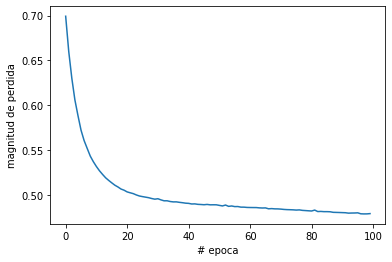

In [21]:
model = Sequential(name = 'RedesNeuronalesAlimentadasHaciaDelante')
model.add(Input(shape=(8,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(31, activation='softplus', name='Hidden-Layer1')) # Numero nueronas en la capa 1, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model.compile( optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy', 'Precision', 'Recall']) 

history = model.fit(X_train, # input data
                    Y_train, # target data
                    epochs = 100, # Numero de pasadas
                    workers=8,
                    verbose=False, #mosrar proceso de entrenamiento
                    validation_split=0.2 #Fraction of the training data to be used as validation data
                    )


loss, accuracy, Precision, Recall = model.evaluate(X_test, Y_test)

plt.xlabel("# epoca")
plt.ylabel("magnitud de perdida")
plt.plot(history.history["loss"])
#loss cuanto más bajo sea el valor, más eficiente es la red neuronal

  

In [26]:
loss_mejor=1
precision_mejor=0
accuracy_mejor=0
recall_mejor=0
numero_neuronas_mejor=0
numero_neuronas_mejor2=0
for neuronas in range(16,128,3):
  for neuronas2 in range(16,128,3):
    model = Sequential(name = 'RedesNeuronalesAlimentadasHaciaDelante')
    model.add(Input(shape=(8,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
    model.add(Dense(neuronas, activation='softplus', name='Hidden-Layer1')) # Numero nueronas en la capa 1, softplus(x) = log(exp(x) + 1)
    model.add(Dense(neuronas2, activation='softplus', name='Hidden-Layer2')) # Numero nueronas en la capa 1, softplus(x) = log(exp(x) + 1)
    model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

    model.compile( optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy', 'Precision', 'Recall']) 

    history = model.fit(X_train, # input data
                        Y_train, # target data
                        epochs = 100, # Numero de pasadas
                        workers=8,
                        verbose=False, #mosrar proceso de entrenamiento
                        validation_split=0.2 #Fraction of the training data to be used as validation data
                        )


    loss, accuracy, Precision, Recall = model.evaluate(X_test, Y_test)

    if(loss<loss_mejor):
      loss_mejor=loss
      accuracy_mejor =accuracy
      recall_mejor=Recall
      precision_mejor=Precision
      numero_neuronas_mejor=neuronas
      numero_neuronas_mejor2=neuronas2
    #plt.xlabel("# epoca")
    #plt.ylabel("magnitud de perdida")
    #plt.plot(history.history["loss"])
    #loss cuanto más bajo sea el valor, más eficiente es la red neuronal


6/6 [==============================] - 0s 5ms/step - loss: 0.4136 - Accuracy: 0.8229 - precision: 0.6981 - recall: 0.6727


In [1]:
print(loss_mejor)
print(precision_mejor)
print(accuracy_mejor)
print(recall_mejor)
print(numero_neuronas_mejor)

NameError: ignored

In [11]:
i =0
for neuronas in range(16,128,15):
  i=i+1
  print(i , ":" , neuronas)
 

1 : 16
2 : 31
3 : 46
4 : 61
5 : 76
6 : 91
7 : 106
8 : 121
